In [22]:
import scipy.io as spio
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft



0. Loading in Data

In [4]:
signal = spio.loadmat('training_data/5G_Downlink.mat')
signal['waveStruct'].dtype

dtype([('type', 'O'), ('config', 'O'), ('Fs', 'O'), ('impairments', 'O'), ('waveform', 'O')])

In [25]:
# Sampling Frequency
#Fs = 100; %Sampling rate
#Ts = 1/Fs; %Sampling time interval
#t = 0:Ts:1-Ts;
#n = length(t); %Number of samples
Fs = signal['waveStruct'][0,0]['Fs'].item()
Ts = 1/Fs
t = 0:Ts:1-Ts
n = lentgh(t)

waveForm = signal['waveStruct'][0,0]['waveform']
print(waveForm)

[[0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 ...
 [1.89878577e-03+2.63421419e-03j]
 [8.24076600e-04+4.43173219e-04j]
 [4.03919243e-05-5.58497704e-05j]]


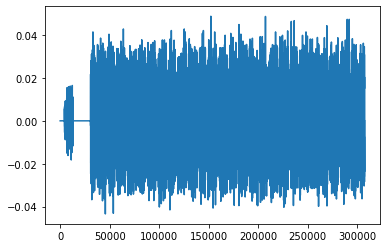

In [21]:
fig = plt.figure(figsize=(8,8))
fig.add
plt.plot(waveForm)


1. FFT Loaded in data

In [24]:
y = fft(waveForm)

print(y)

[[0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j]
 ...
 [1.89878577e-03+2.63421419e-03j]
 [8.24076600e-04+4.43173219e-04j]
 [4.03919243e-05-5.58497704e-05j]]


In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

t_n = 10
N = 1000
T = t_n / N
f_s = 1/T

x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)

y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]

for ii in range(0,len(y_values_)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x=np.linspace(0,10,1000)
    y=np.array([frequencies[ii]]*length)
    z=signal

    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)

    x=[10]*75
    y=f_values[:75]
    z = fft_values[:75]*3
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')
    
    plt.tight_layout()
plt.show()

NameError: name 'get_fft_values' is not defined